<a href="https://colab.research.google.com/github/NilotpalMaitra/Cats-and-Dogs-classification/blob/main/ML_workshop_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nilotpalmaitra","key":"6ff207d5b2f6b2496902349dbf27beb9"}'}

In [3]:
! mkdir ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle/

In [5]:
!cp kaggle.json ~/.kaggle/

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          12026        276  1.0              
kanchana1990/2024-amazon-best-sellers-top-valentine-gifts  2024 Amazon Best Sellers: Top Valentine Gifts 🎯💘   25KB  2024-02-06 18:49:26            644         32  1.0              
hummaamqaasim/jobs-in-data                                 Jobs and Salaries in Data Science                  76KB  2023-12-25 20:03:32          16880        281  1.0              
shiivvvaam/top-youtuber-worldwide                          Top YouTubers Worldwide             

In [12]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:14<00:00, 17.9MB/s]
100% 1.06G/1.06G [00:14<00:00, 79.6MB/s]


In [13]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [19]:
import zipfile

# Specify the file path of the uploaded ZIP file
zip_file_path = 'dogs-vs-cats.zip'

# Extract the contents of the ZIP file to the '/content' directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flattenb

In [21]:
#initializing the cnn
classifier=Sequential()

In [ ]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generating images for the training set
train_datagen = ImageDataGenerator(rescale=1./255)


In [29]:
training_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 20000 images belonging to 2 classes.


In [30]:
test_set = test_datagen.flow_from_directory('/content/dogs_vs_cats/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


Found 5000 images belonging to 2 classes.


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Define your model
classifier = Sequential()

# Step 1: Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2: Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Flattening
classifier.add(Flatten())

# Step 4: Full Connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/dogs_vs_cats/test', target_size=(64, 64), batch_size=32, class_mode='binary')

# Train the model
classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, validation_steps=2000)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


<ipython-input-33-419a41f9ef9c>:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, validation_steps=2000)


Epoch 1/25
 625/8000 [=>............................] - ETA: 31:23 - loss: 0.6142 - accuracy: 0.6675

8000/8000 [==============================] - 182s 23ms/step - loss: 0.6142 - accuracy: 0.6675 - val_loss: 0.5675 - val_accuracy: 0.7114


In [35]:
# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
# Run epochs to train the model
classifier.fit(training_set, epochs=10)  # Example: train for 10 epochs


Epoch 1/10
625/625 [==============================] - 149s 237ms/step - loss: 0.5505 - accuracy: 0.7185
Epoch 2/10
625/625 [==============================] - 142s 228ms/step - loss: 0.5273 - accuracy: 0.7358
Epoch 3/10
625/625 [==============================] - 135s 216ms/step - loss: 0.5016 - accuracy: 0.7531
Epoch 4/10
625/625 [==============================] - 135s 216ms/step - loss: 0.4874 - accuracy: 0.7664
Epoch 5/10
625/625 [==============================] - 136s 218ms/step - loss: 0.4714 - accuracy: 0.7743
Epoch 6/10
625/625 [==============================] - 138s 221ms/step - loss: 0.4603 - accuracy: 0.7790
Epoch 7/10
625/625 [==============================] - 136s 218ms/step - loss: 0.4490 - accuracy: 0.7887
Epoch 8/10
625/625 [==============================] - 140s 224ms/step - loss: 0.4350 - accuracy: 0.7962
Epoch 9/10
625/625 [==============================] - 139s 222ms/step - loss: 0.4250 - accuracy: 0.8037
Epoch 10/10
625/625 [==============================] - 136s 218m

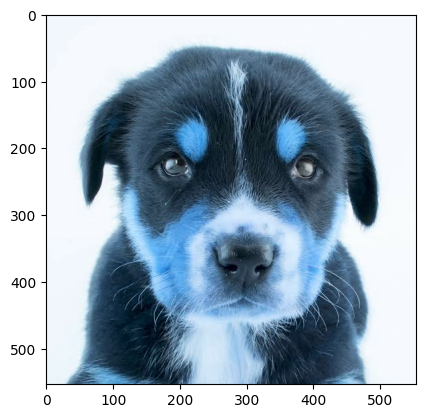

In [43]:
import cv2
import matplotlib.pyplot as plt

# Read the test image
testImage = cv2.imread('/content/dog.jpg')

# Display the test image
plt.imshow(testImage)
plt.show()


In [53]:
import cv2
import numpy as np

# Load the test image (replace 'path_to_image.jpg' with the actual path to your image file)
testImage = cv2.imread('/content/dog.jpg')

# Check if the image was loaded successfully
if testImage is None:
    print("Error: Failed to load the image.")
else:
    # Resize the test image to the desired dimensions
    resizedImage = cv2.resize(testImage, (64, 64))

    # Reshape the image to match the input shape expected by the model
    testIP = resizedImage.reshape((1, 64, 64, 3))

    # Make predictions using the classifier/model (replace 'classifier' with your actual model)
    predictions = classifier.predict(testIP)

    # Display the predictions
    print(predictions)


1/1 [==============================] - 0s 189ms/step
[[1.]]


In [54]:
import cv2
import numpy as np

# Load the test image (replace 'path_to_image.jpg' with the actual path to your image file)
testImage = cv2.imread('/content/cat.jpg')

# Check if the image was loaded successfully
if testImage is None:
    print("Error: Failed to load the image.")
else:
    # Resize the test image to the desired dimensions
    resizedImage = cv2.resize(testImage, (64, 64))

    # Reshape the image to match the input shape expected by the model
    testIP = resizedImage.reshape((1, 64, 64, 3))

    # Make predictions using the classifier/model (replace 'classifier' with your actual model)
    predictions = classifier.predict(testIP)

    # Display the predictions
    print(predictions)


1/1 [==============================] - 0s 32ms/step
[[1.]]
